#Trending Youtube video data analysis
This is a project created to analyse the trending videos for a period of November 2017 to June 2018.
The main of this project includes analysis of the dataset and using visualizations to interpret the results, exploring libraries such as Matplotlib and Seaborn

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading csv file
df = pd.read_csv("INvideos.csv", parse_dates = ['trending_date'], date_format = "%y.%d.%m")

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                37352 non-null  object        
 1   trending_date           37352 non-null  datetime64[ns]
 2   title                   37352 non-null  object        
 3   channel_title           37352 non-null  object        
 4   category_id             37352 non-null  int64         
 5   publish_time            37352 non-null  object        
 6   tags                    37352 non-null  object        
 7   views                   37352 non-null  int64         
 8   likes                   37352 non-null  int64         
 9   dislikes                37352 non-null  int64         
 10  comment_count           37352 non-null  int64         
 11  thumbnail_link          37352 non-null  object        
 12  comments_disabled       37352 non-null  bool  

In [ ]:
df.shape

(37352, 16)

In [ ]:
df.isna().sum()
#561 videos do not have description

,0
video_id,0
trending_date,0
title,0
channel_title,0
category_id,0
publish_time,0
tags,0
views,0
likes,0
dislikes,0


In [ ]:
#Removing duplicated values
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
print("Duplicates dropped!")

4263
Duplicates dropped!


In [ ]:
#Describing data
df.describe()

,trending_date,category_id,views,likes,dislikes,comment_count
count,33089,33089.000000,3.308900e+04,3.308900e+04,3.308900e+04,33089.000000
mean,2018-02-18 22:20:07.434494720,21.628154,9.963425e+05,2.558762e+04,1.576535e+03,2524.777660
min,2017-11-14 00:00:00,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000
25%,2017-12-27 00:00:00,23.000000,1.127190e+05,7.870000e+02,9.800000e+01,72.000000
50%,2018-02-14 00:00:00,24.000000,2.750270e+05,2.757000e+03,2.890000e+02,298.000000
75%,2018-04-14 00:00:00,24.000000,7.320220e+05,1.201100e+04,9.320000e+02,1169.000000
max,2018-06-14 00:00:00,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000
std,NaN,6.493615,3.148111e+06,9.647320e+04,1.689573e+04,14769.825108


--
##Visualizations

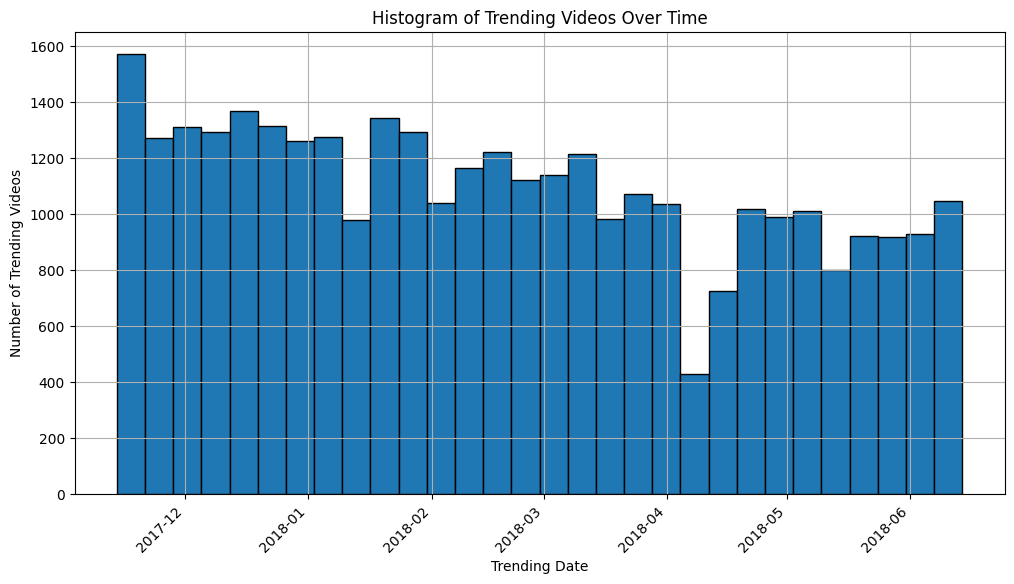

In [ ]:
# Histogram of time to check which period resulted in most trending videos
plt.style.use('default')
plt.figure(figsize=(12, 6))
df['trending_date'].hist(bins=30, edgecolor='black')
plt.xlabel('Trending Date')
plt.ylabel('Number of Trending Videos')
plt.title('Histogram of Trending Videos Over Time')
plt.xticks(rotation=45, ha='right')
plt.show()


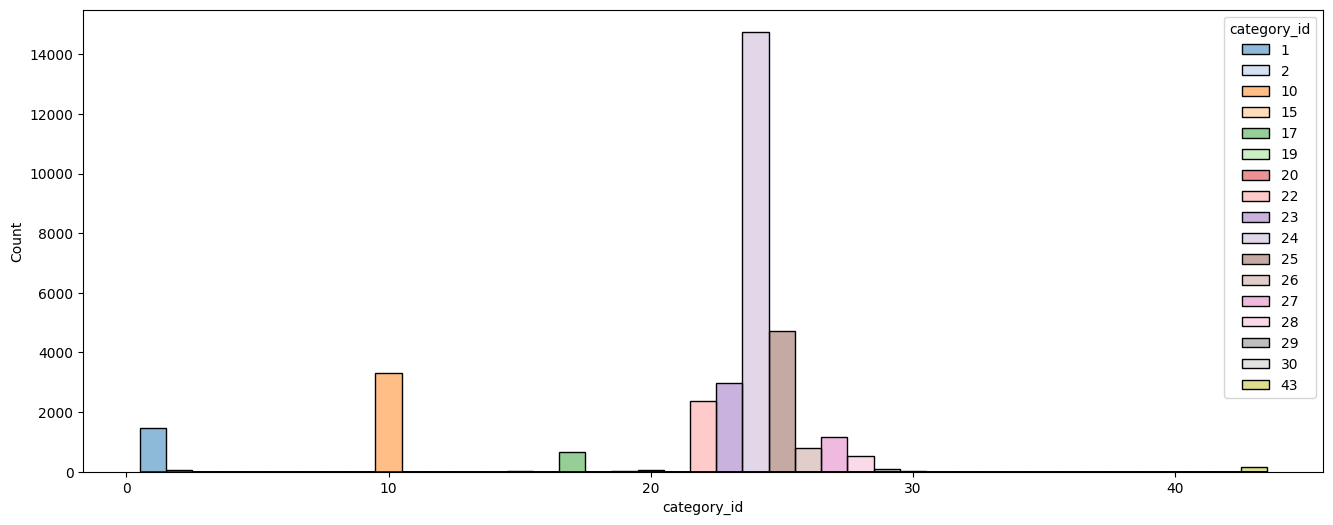

In [ ]:
#Histogram of categories, to check how videos are spread across categories
import numpy as np
plt.figure(figsize = (16,6))
bins = np.arange(1,25)
sns.histplot(x = 'category_id', palette = 'tab20', hue = 'category_id', data = df, bins = bins, discrete = True)
plt.show()

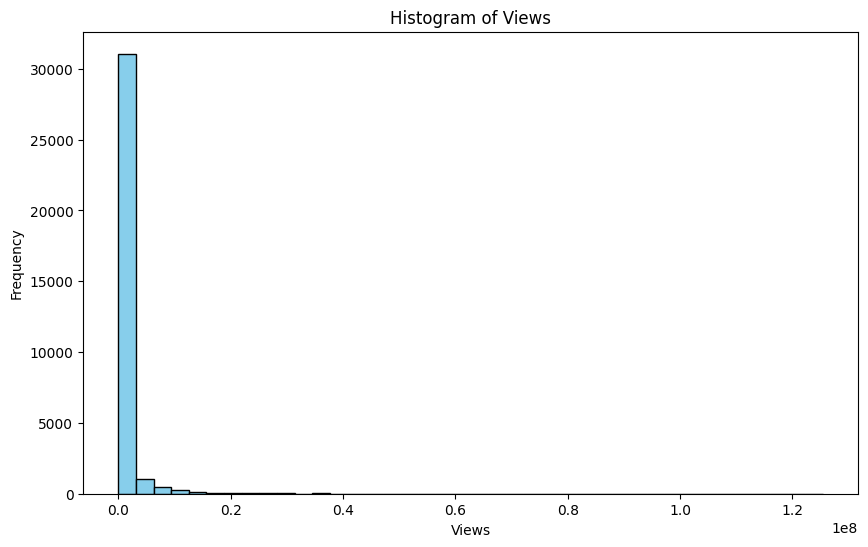

In [ ]:
#Histogram of views, to visualize distribution
plt.figure(figsize=(10, 6))
plt.hist(df['views'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.title('Histogram of Views')
plt.show()

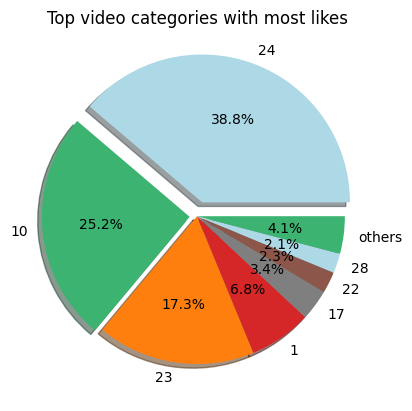

In [ ]:
#Categories with most liked videos
dflikes = df.groupby('category_id')['likes'].sum().reset_index().sort_values(by = 'likes', ascending = False)
dflikes_top = dflikes[:7]
dfother_sum = dflikes['likes'][7:].sum()
dict1 = {'category_id':'others','likes':[dfother_sum]}
df2 = pd.DataFrame(dict1)

df1 = pd.concat([dflikes_top, df2], ignore_index = True)

explode = [0.1,0.05,0,0,0,0,0,0]
plt.pie(df1['likes'], labels = df1.category_id, colors = ['lightblue','mediumseagreen','tab:orange','tab:red','tab:gray','tab:brown'], autopct= "%.1f%%", explode = explode, shadow = True)
plt.title("Top video categories with most likes")
plt.show()

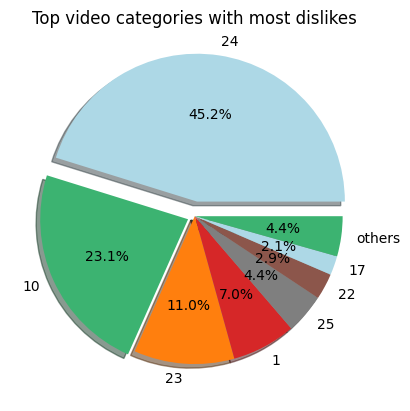

In [ ]:
#Categories with most disliked videos
dflikes = df.groupby('category_id')['dislikes'].sum().reset_index().sort_values(by = 'dislikes', ascending = False)
dflikes_top = dflikes[:7]
dfother_sum = dflikes['dislikes'][7:].sum()
dict1 = {'category_id':'others','dislikes':[dfother_sum]}
df2 = pd.DataFrame(dict1)

df1 = pd.concat([dflikes_top, df2], ignore_index = True)

explode = [0.1,0.05,0,0,0,0,0,0]
plt.pie(df1['dislikes'], labels = df1.category_id, colors = ['lightblue','mediumseagreen','tab:orange','tab:red','tab:gray','tab:brown'], autopct= "%.1f%%", explode = explode, shadow = True)
plt.title("Top video categories with most dislikes")
plt.show()

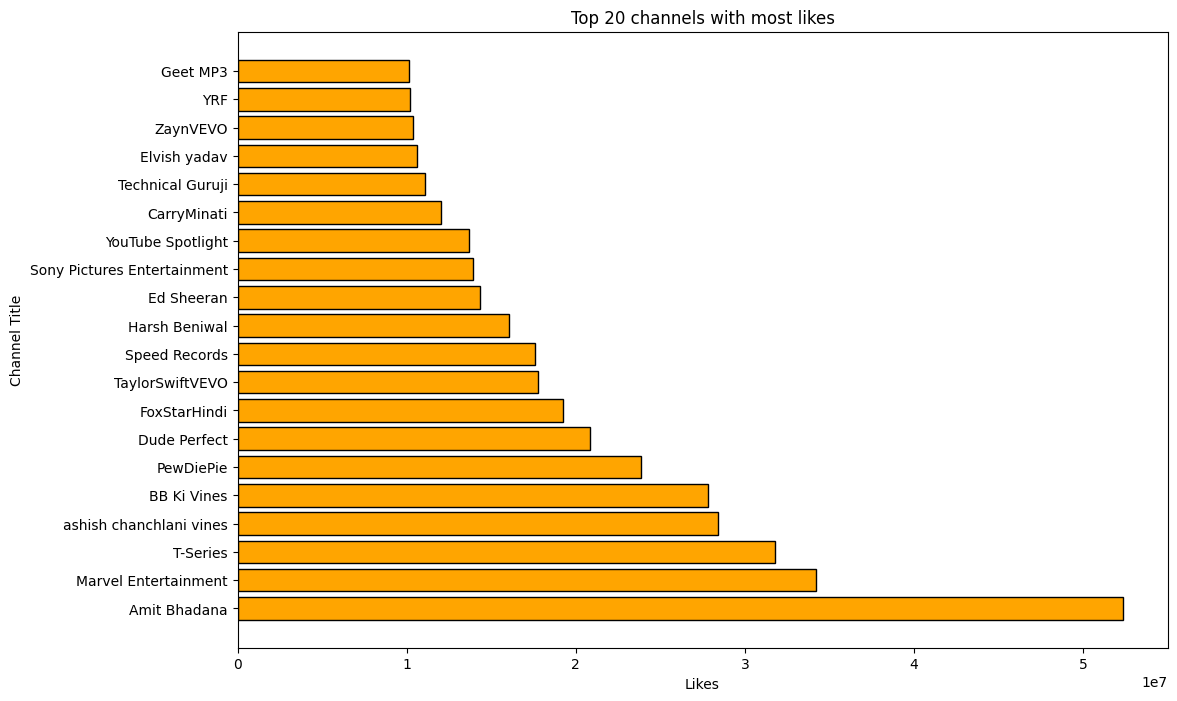

In [ ]:
#Top channels with most likes
plt.style.use('default')
df1 = df.groupby('channel_title')['likes'].sum().reset_index().sort_values(by = 'likes', ascending = False)
df1 = df1[:20]

plt.figure(figsize = (12,8))
plt.barh(df1['channel_title'], df1['likes'], edgecolor = 'black', color = 'orange')
plt.title("Top 20 channels with most likes")
plt.xlabel("Likes")
plt.ylabel('Channel Title')
plt.show()

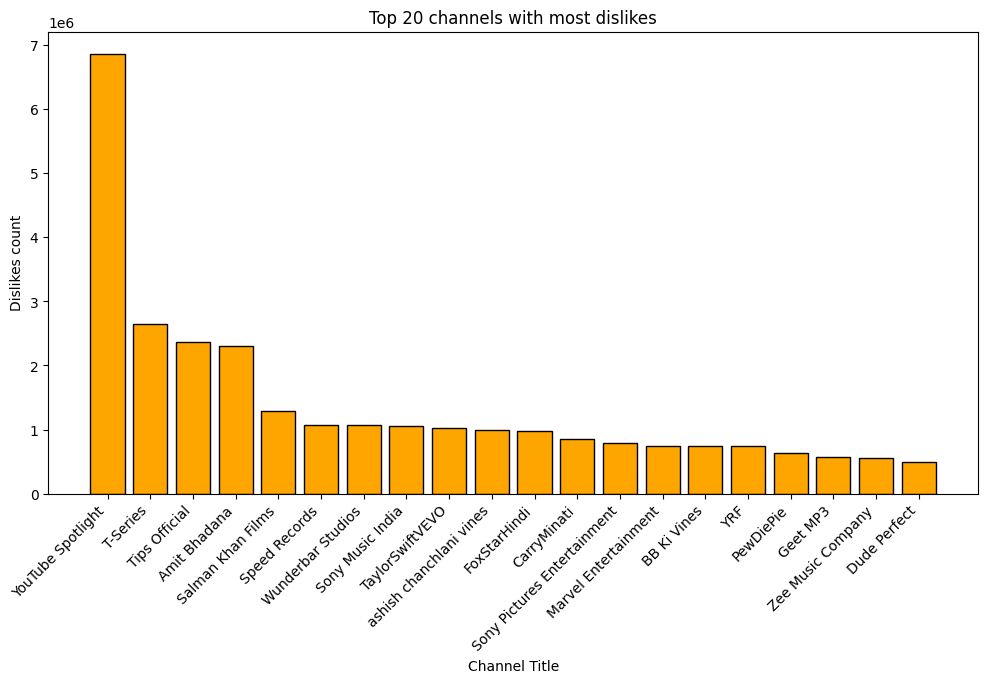

In [ ]:
#Top channels with most dislikes.
df1 = df.groupby('channel_title')['dislikes'].sum().reset_index().sort_values(by = 'dislikes', ascending = False)
df1 = df1[:20]

plt.figure(figsize = (12,6))
plt.bar(df1['channel_title'], df1['dislikes'], edgecolor = 'black', color = 'orange')
plt.title("Top 20 channels with most dislikes")
plt.xlabel("Channel Title")
plt.ylabel('Dislikes count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

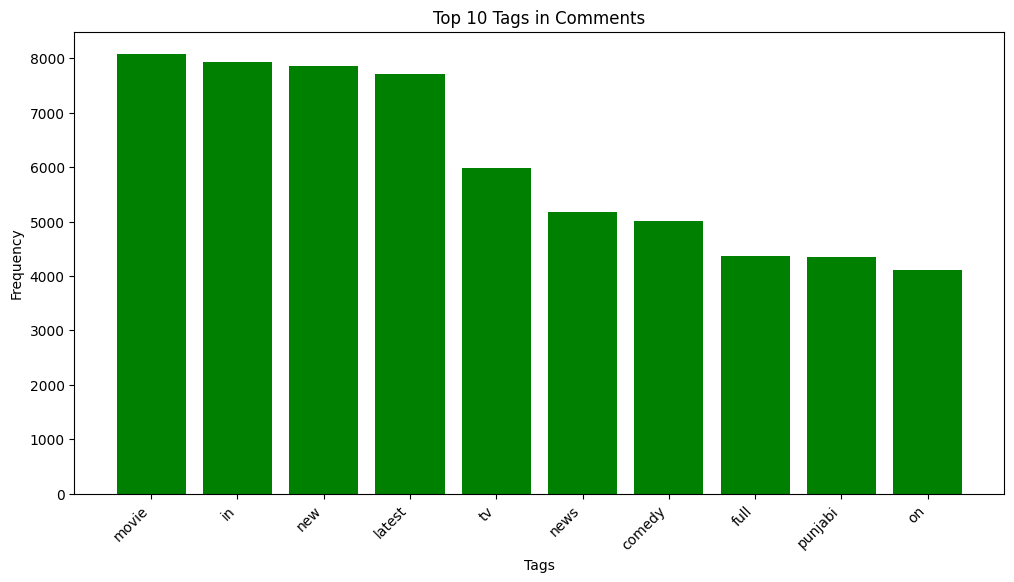

In [ ]:
#Top 10 tags used
from collections import Counter

all_comments = ' '.join(df['tags'].astype(str))

tokens = all_comments.lower().split()

word_counts = Counter(tokens)

# top N tags
top_n = 10
top_tags = word_counts.most_common(top_n)

#bar chart
tags, counts = zip(*top_tags)
plt.figure(figsize=(12, 6))
plt.bar(tags, counts, color = "green")
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top {} Tags in Comments'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.show()

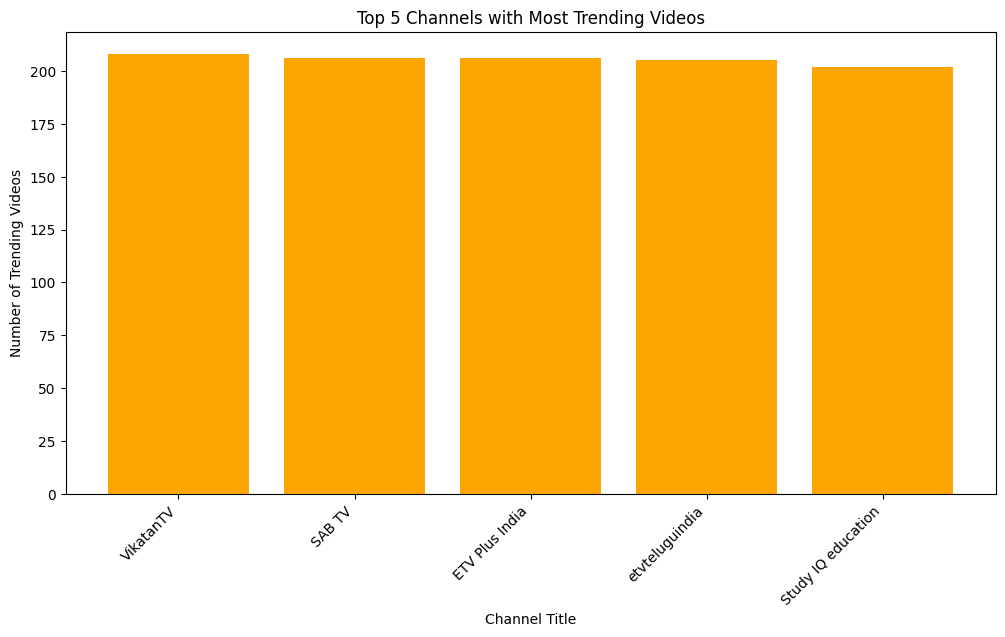

In [ ]:
#Top 5 channels with most trending videos
df_top_channels = df.groupby('channel_title')['video_id'].count().reset_index().sort_values(by='video_id', ascending=False)
df_top_channels = df_top_channels.head(5)

plt.figure(figsize=(12, 6))
plt.bar(df_top_channels['channel_title'], df_top_channels['video_id'], color='orange')
plt.xlabel('Channel Title')
plt.ylabel('Number of Trending Videos')
plt.title('Top 5 Channels with Most Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.show()

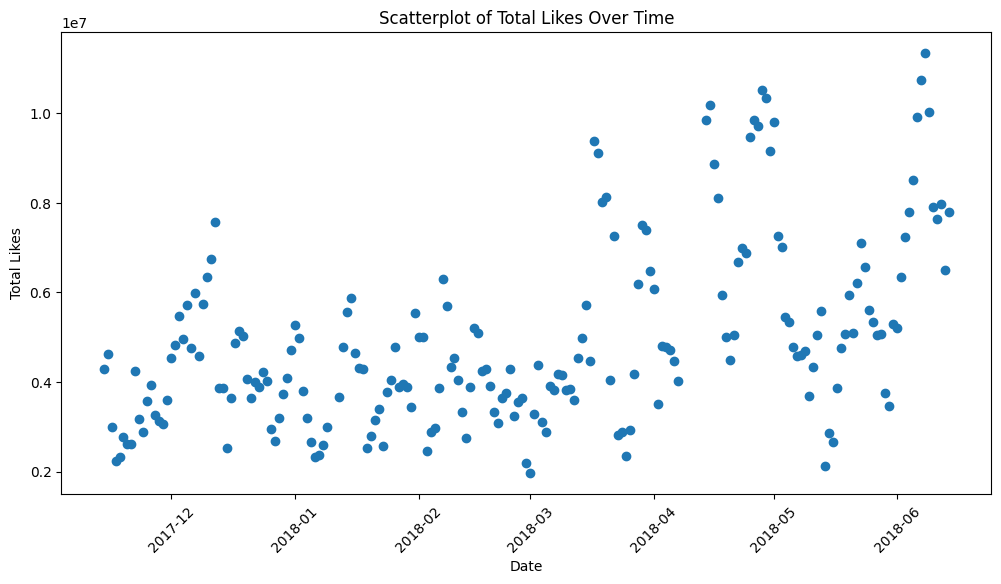

In [ ]:
#Visualize likes over time
df_likes_by_date = df.groupby('trending_date')['likes'].sum().reset_index()

#scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(df_likes_by_date['trending_date'], df_likes_by_date['likes'])
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.title('Scatterplot of Total Likes Over Time')
plt.xticks(rotation=45)
plt.show()

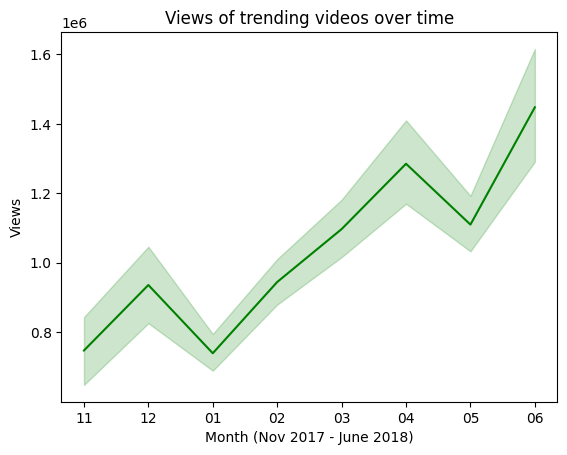

In [ ]:
#Trend of views over time, line chart
df1 = df
df1['Month'] = df1['trending_date'].dt.strftime("%m")
sns.lineplot(x = 'Month', y = 'views', data = df1, color = 'green')
plt.title('Views of trending videos over time')
plt.xlabel("Month (Nov 2017 - June 2018)")
plt.ylabel('Views')
plt.show()

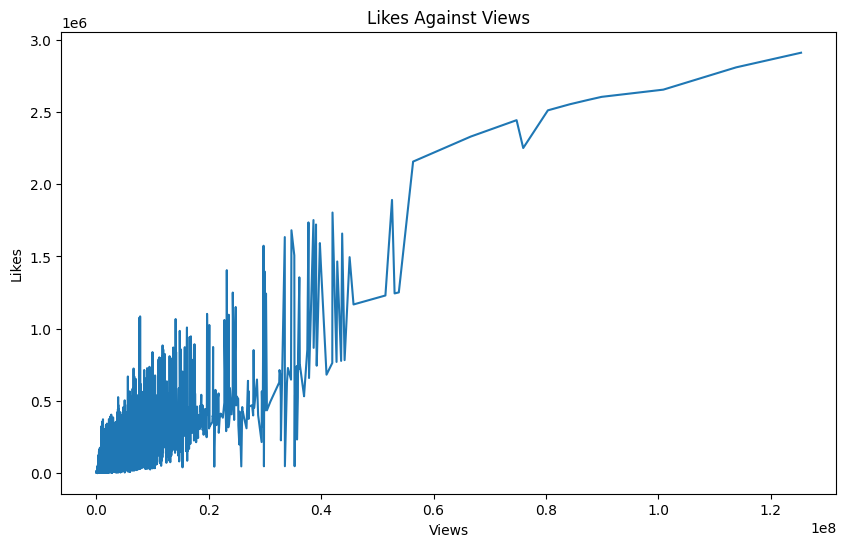

In [ ]:
#Likes against views
plt.figure(figsize = (10,6))
sns.lineplot(x='views', y='likes', data=df)
plt.title("Likes Against Views")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()

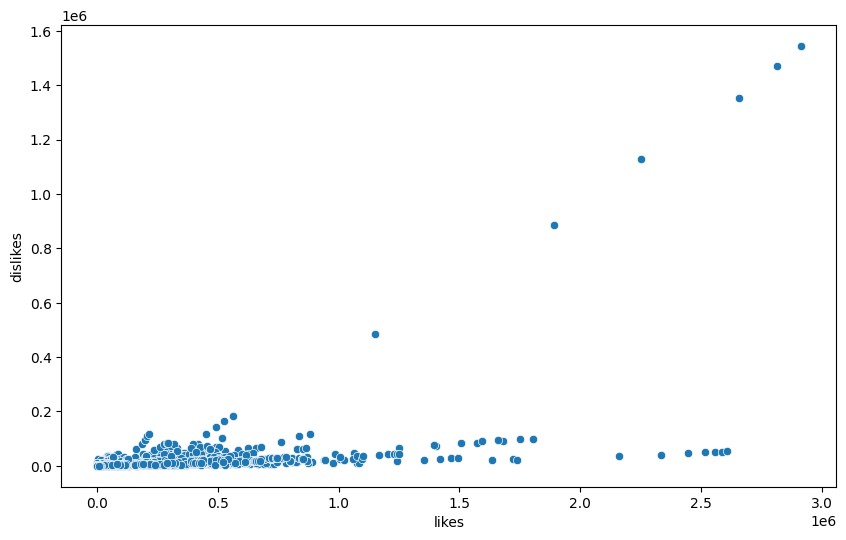

In [ ]:
#Jointplot for likes and dislikes
plt.figure(figsize = (10,6))
sns.scatterplot(x='likes', y='dislikes', data=df)
plt.show()

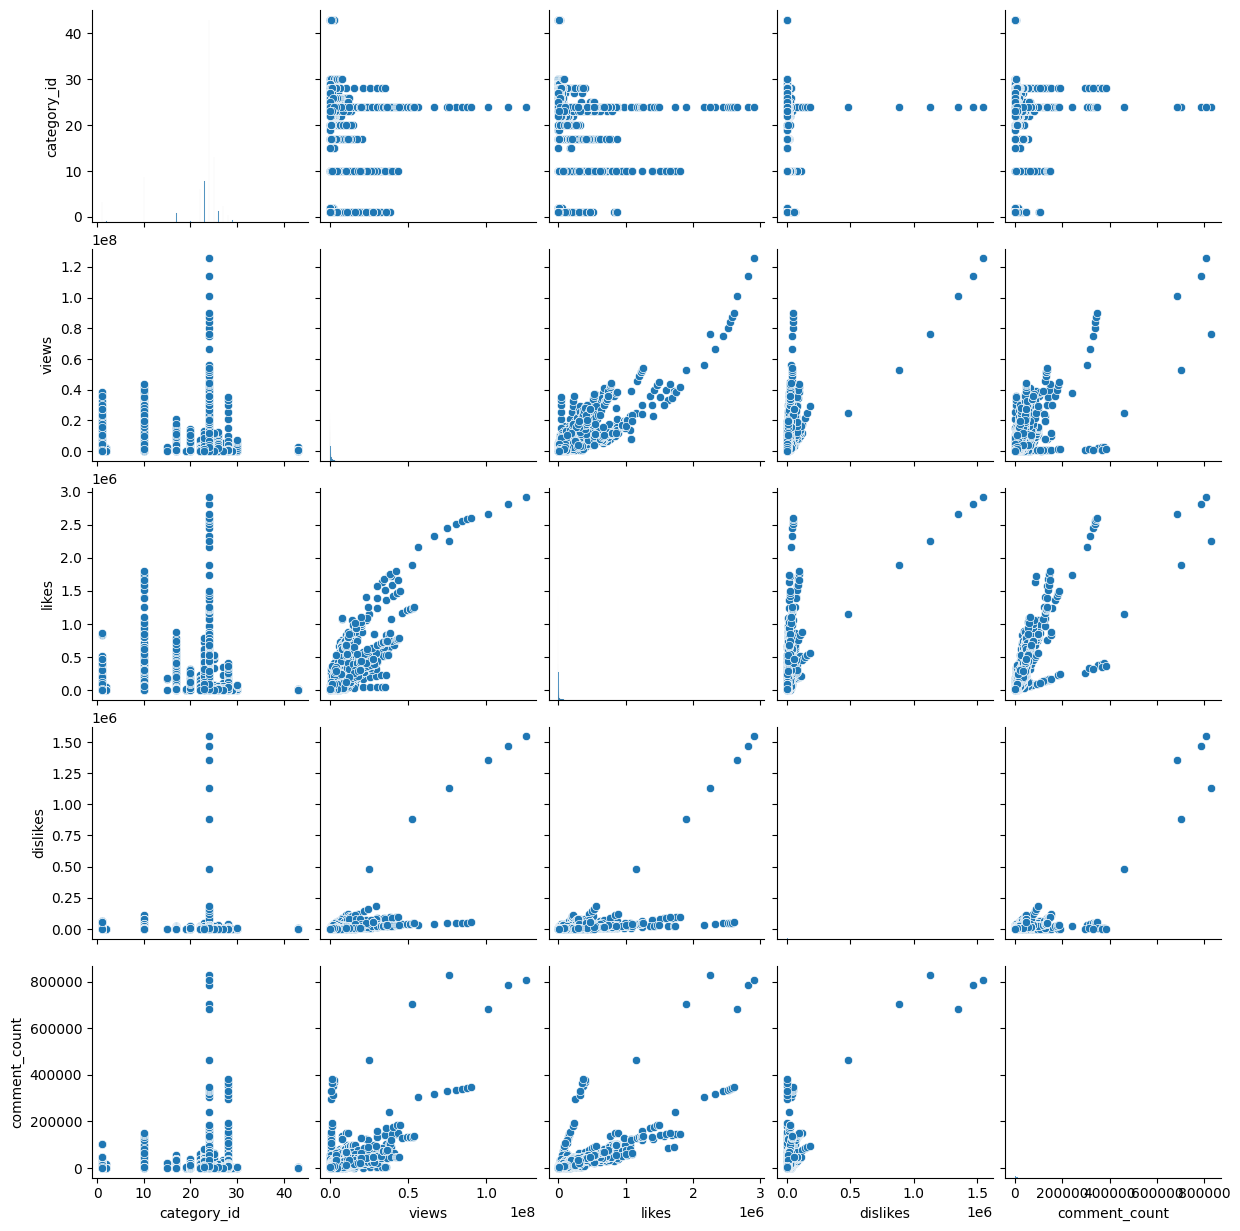

In [ ]:
#Pairplot for all numeric data values
sns.pairplot(df.select_dtypes(['number']))
plt.show()

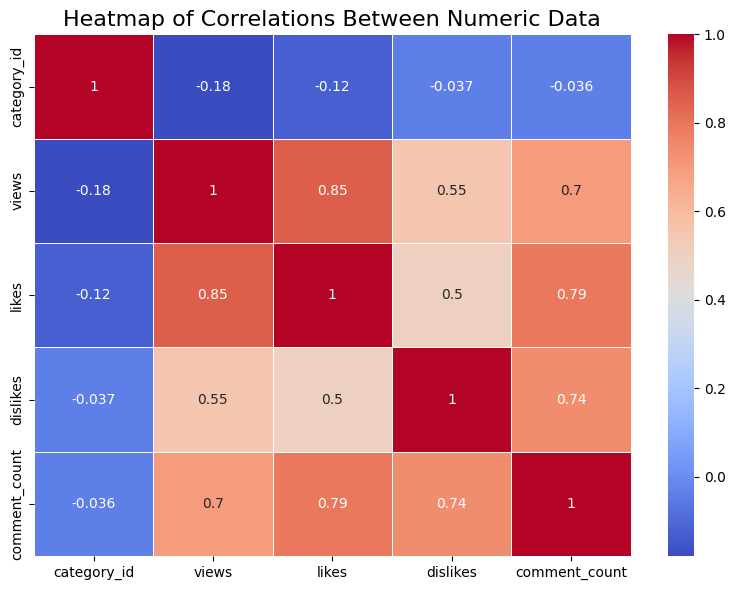

In [ ]:
#Heatmap for numeric data
# Compute the correlation matrix
corr_matrix = df.select_dtypes(['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Heatmap of Correlations Between Numeric Data', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


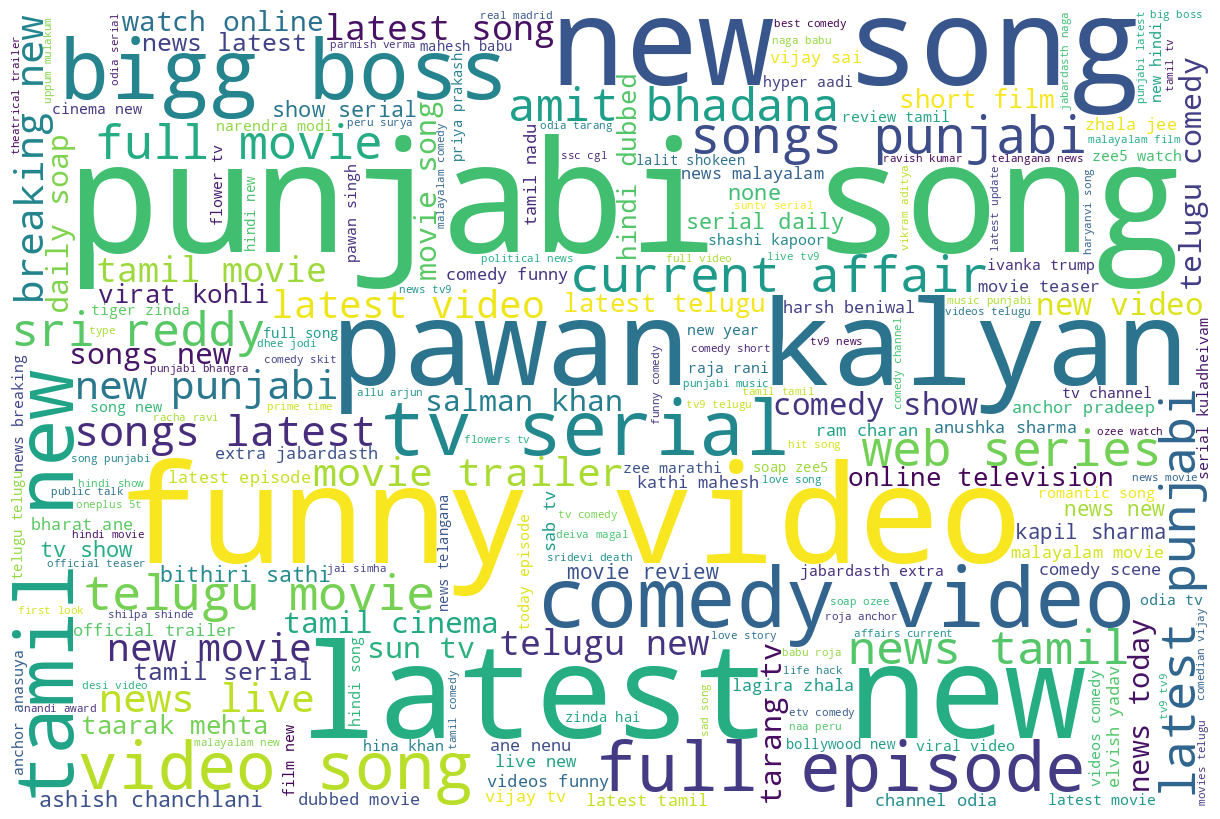

In [ ]:
#Creating a wordcloud of all the tags used in the tags of videos
from wordcloud import WordCloud, STOPWORDS

comment_words = ''

# iterate through the csv file
for val in df.tags:
    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
